In [ ]:
'''
Assignment on Clustering Techniques
Download the following customer dataset from below link:
Data Set: https://www.kaggle.com/shwetabh123/mall-customers
This dataset gives the data of Income and money spent by the customers visiting a Shopping Mall. The
data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as a mall owner
you need to find the group of people who are the profitable customers for the mall owner. Apply at least
two clustering algorithms (based on Spending Score) to find the group of customers.
a. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary.
b. Perform data-preparation( Train-Test Split)
c. Apply Machine Learning Algorithm
d. Evaluate Model.
e. Apply Cross-Validation and Evaluate Model
'''

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [91]:
df=pd.read_csv("mall.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [92]:
df.shape

(200, 5)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [94]:
X = df.iloc[:,3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [95]:
WCSS=[]

In [96]:
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

/Users/aditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

Text(0, 0.5, 'WCSS')

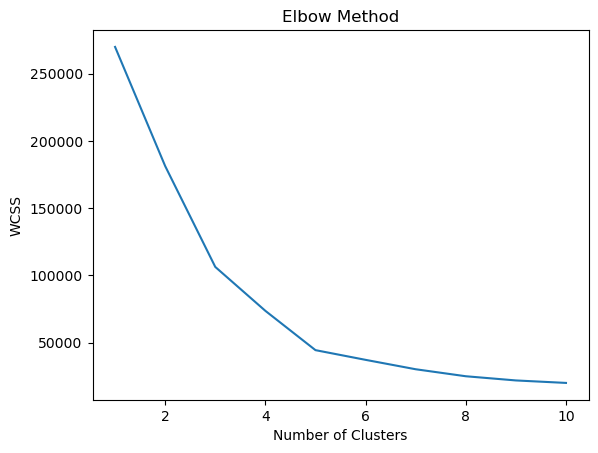

In [97]:
plt.plot(range(1,11),WCSS)
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [98]:
kmeans = KMeans(n_clusters = 5 , init = 'k-means++', max_iter = 300, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/Users/aditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [99]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [100]:
y_kmeans.shape

(200,)

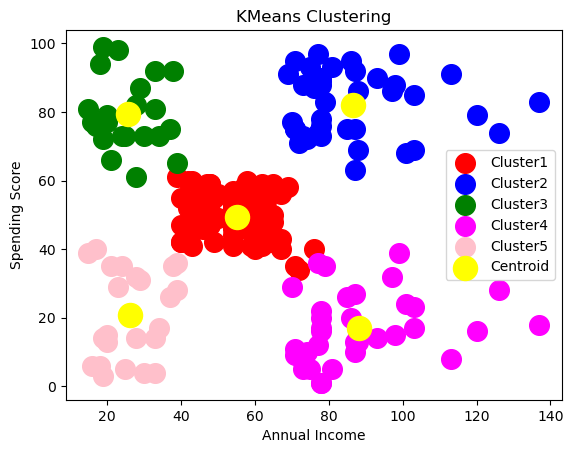

In [101]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=200,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=200,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=200,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=200,c='magenta',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=200,c='pink',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroid')
plt.title("KMeans Clustering")
plt.xlabel("Annual Income")
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [102]:
import  matplotlib.cm as cm
from sklearn.metrics import silhouette_samples , silhouette_score 

In [105]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:

#Initialize the clusterer with n_clusters value and a random generator 
#seed of 10 for reproducibility

    clusterer = KMeans(n_clusters = n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

#The silhouette score gives the average value for all the samples.
#This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score (X, cluster_labels) 
    print("For n_clusters = ",n_clusters, "The average silhouette score is : ", silhouette_avg,)

For n_clusters =  2 The average silhouette score is :  0.2968969162503008
For n_clusters =  3 The average silhouette score is :  0.46761358158775435
For n_clusters =  4 The average silhouette score is :  0.4931963109249047
For n_clusters =  5 The average silhouette score is :  0.553931997444648
For n_clusters =  6 The average silhouette score is :  0.5393922132561455


/Users/aditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

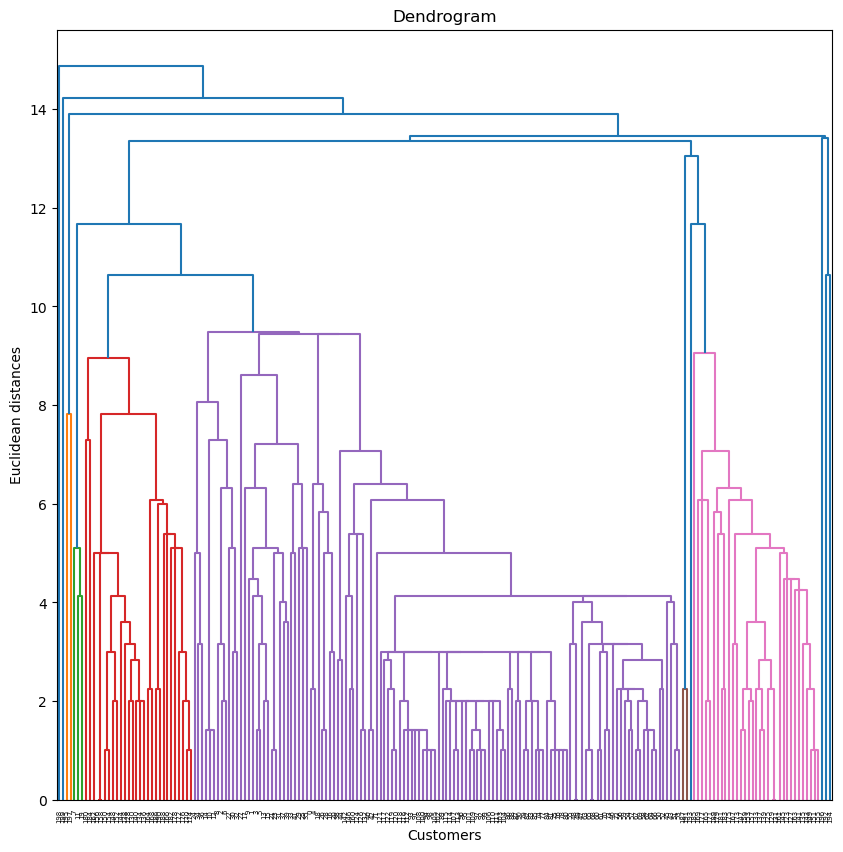

In [107]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel("Euclidean distances")
plt.show()

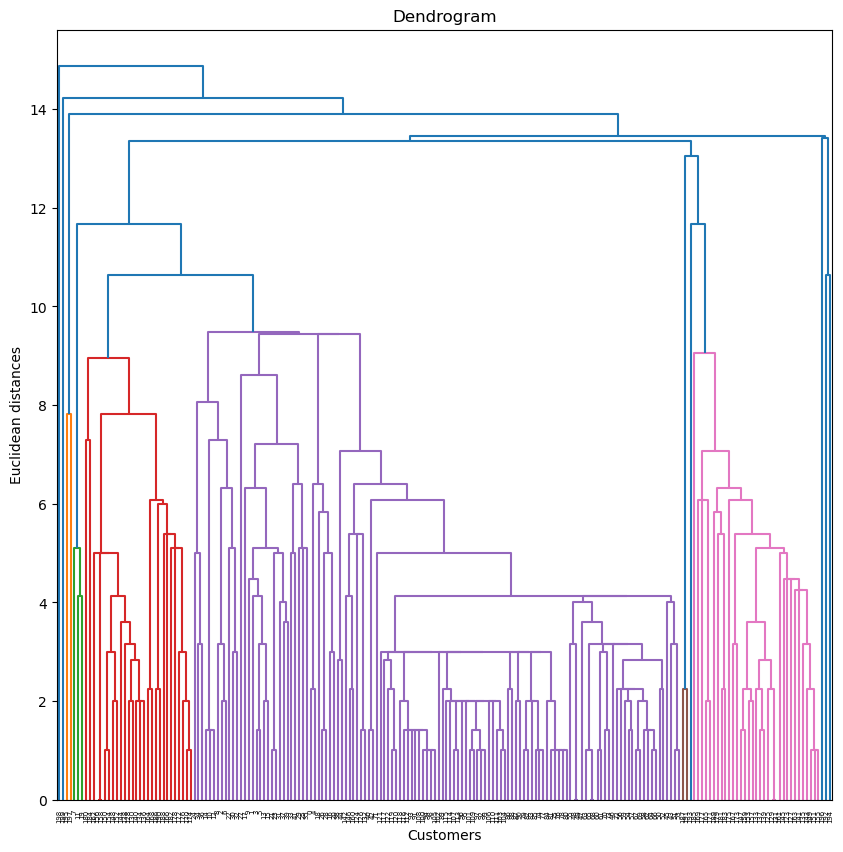

In [115]:
plt.figure(figsize=(10, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method='single'), truncate_mode='level', p=10)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [109]:
from sklearn.cluster import AgglomerativeClustering

In [111]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)

/Users/aditya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


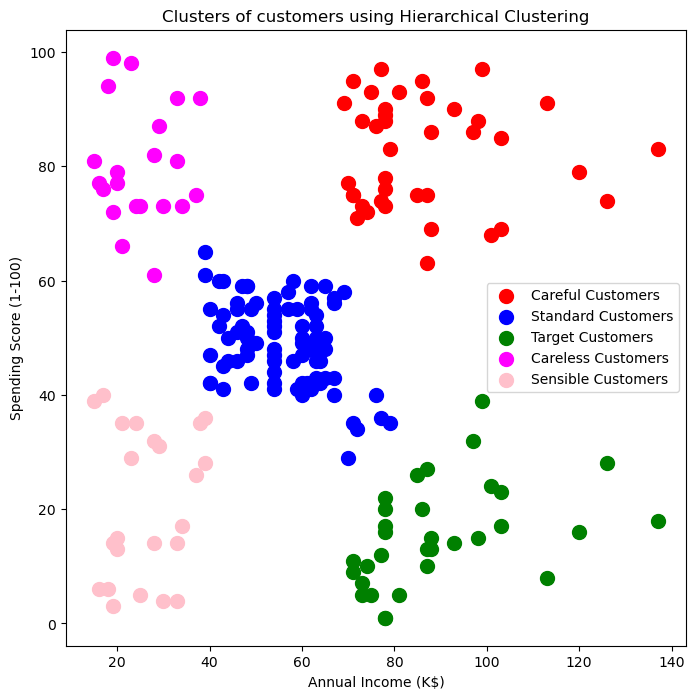

In [113]:
# Visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0,0],X[y_hc == 0,1],s=100,c='red',label = 'Careful Customers')
plt.scatter(X[y_hc == 1,0],X[y_hc == 1,1],s=100,c='blue',label = 'Standard Customers')
plt.scatter(X[y_hc == 2,0],X[y_hc == 2,1],s=100,c='green',label = 'Target Customers')
plt.scatter(X[y_hc == 3,0],X[y_hc == 3,1],s=100,c='magenta',label = 'Careless Customers')
plt.scatter(X[y_hc == 4,0],X[y_hc == 4,1],s=100,c='pink',label = 'Sensible Customers')

plt.title("Clusters of customers using Hierarchical Clustering")
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()